# HIPAA DATA BREACHES

HIPAA data breaches refer to incidents where the privacy or security of protected health information (PHI) is compromised, in violation of the Health Insurance Portability and Accountability Act (HIPAA) regulations. HIPAA is a U.S. federal law enacted in 1996 to safeguard sensitive health information and to set national standards for the protection of patients' medical records and other health-related data.

![HIPAA](HIPAA.jpg)

IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np                    
import pandas as pd                  
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('HIPAA Breach Report (2009-2017).csv')

CHECKING THE DATASET

In [3]:
data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [4]:
data.tail()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1716,"Amy E. Carter, MD d/b/a Cove Family and Sports...",AL,Healthcare Provider,4300.0,06/13/2017,Hacking/IT Incident,Network Server,No,NaN
1717,"Krichev Family Medicine, P.C.",AL,Healthcare Provider,4300.0,06/13/2017,Hacking/IT Incident,Network Server,No,NaN
1718,Texas Health and Human Services,TX,Health Plan,1842.0,06/15/2017,Improper Disposal,Paper/Films,No,NaN
1719,Baptist Medical Center South,FL,Healthcare Provider,531.0,06/30/2017,Loss,Other Portable Electronic Device,No,NaN
1720,"WellCare Health Plans, Inc.",FL,Health Plan,1214.0,08/11/2017,Unauthorized Access/Disclosure,Paper/Films,No,NaN


In [5]:
data.shape

(1721, 9)

In [6]:
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            1721 non-null   object 
 1   State                             1709 non-null   object 
 2   Covered Entity Type               1649 non-null   object 
 3   Individuals Affected              1661 non-null   float64
 4   Breach Submission Date            1721 non-null   object 
 5   Type of Breach                    1675 non-null   object 
 6   Location of Breached Information  1678 non-null   object 
 7   Business Associate Present        1721 non-null   object 
 8   Web Description                   1517 non-null   object 
dtypes: float64(1), object(8)
memory usage: 121.1+ KB


In [8]:
data['Type of Breach'].value_counts()

Theft                                                         727
Unauthorized Access/Disclosure                                394
Hacking/IT Incident                                           202
Loss                                                          127
Other                                                          77
Improper Disposal                                              56
Theft, Unauthorized Access/Disclosure                          24
Loss, Theft                                                    14
Unknown                                                         9
Hacking/IT Incident, Unauthorized Access/Disclosure             8
Other, Unauthorized Access/Disclosure                           7
Improper Disposal, Loss, Theft                                  3
Other, Theft                                                    3
Improper Disposal, Loss                                         3
Loss, Unauthorized Access/Disclosure                            3
Loss, Othe

In [9]:
data['Covered Entity Type'].value_counts()

Healthcare Provider          1160
Business Associate            271
Health Plan                   214
Healthcare Clearing House       4
Name: Covered Entity Type, dtype: int64

In [10]:
data.dtypes

Name of Covered Entity               object
State                                object
Covered Entity Type                  object
Individuals Affected                float64
Breach Submission Date               object
Type of Breach                       object
Location of Breached Information     object
Business Associate Present           object
Web Description                      object
dtype: object

In [11]:
data.describe()

,Individuals Affected
count,1.661000e+03
mean,9.567978e+04
std,1.984321e+06
min,5.000000e+02
25%,9.710000e+02
50%,2.209000e+03
75%,7.000000e+03
max,7.880000e+07


CLEANING THE DATASET

In [12]:
data.isnull().sum()

Name of Covered Entity                0
State                                12
Covered Entity Type                  72
Individuals Affected                 60
Breach Submission Date                0
Type of Breach                       46
Location of Breached Information     43
Business Associate Present            0
Web Description                     204
dtype: int64

In [13]:
L=['State', 'Covered Entity Type', 'Individuals Affected', 'Type of Breach', 'Location of Breached Information', 'Web Description']
for column in L:
    data.dropna(how='all', subset=[column], inplace=True)

In [14]:
data.shape

(1452, 9)

DATA VISUALIZATION

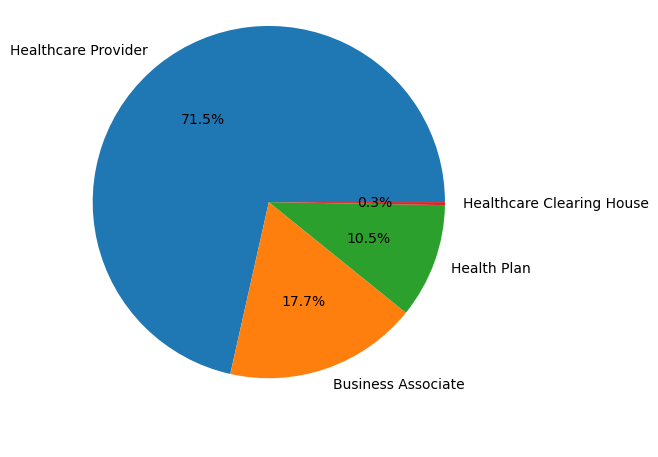

In [15]:
plt.figure(figsize=(5,5))
plt.title(' ', y=-0.15)
plt.pie(data['Covered Entity Type'].value_counts(), labels=list(data['Covered Entity Type'].value_counts().index), autopct="%.1f%%")
plt.axis('equal');

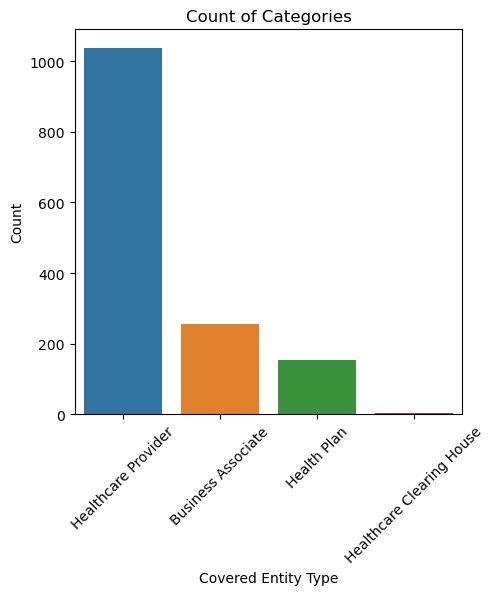

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Covered Entity Type', data=data, dodge=True, order=data['Covered Entity Type'].value_counts().index)
plt.xlabel('Covered Entity Type')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=45)
plt.show()

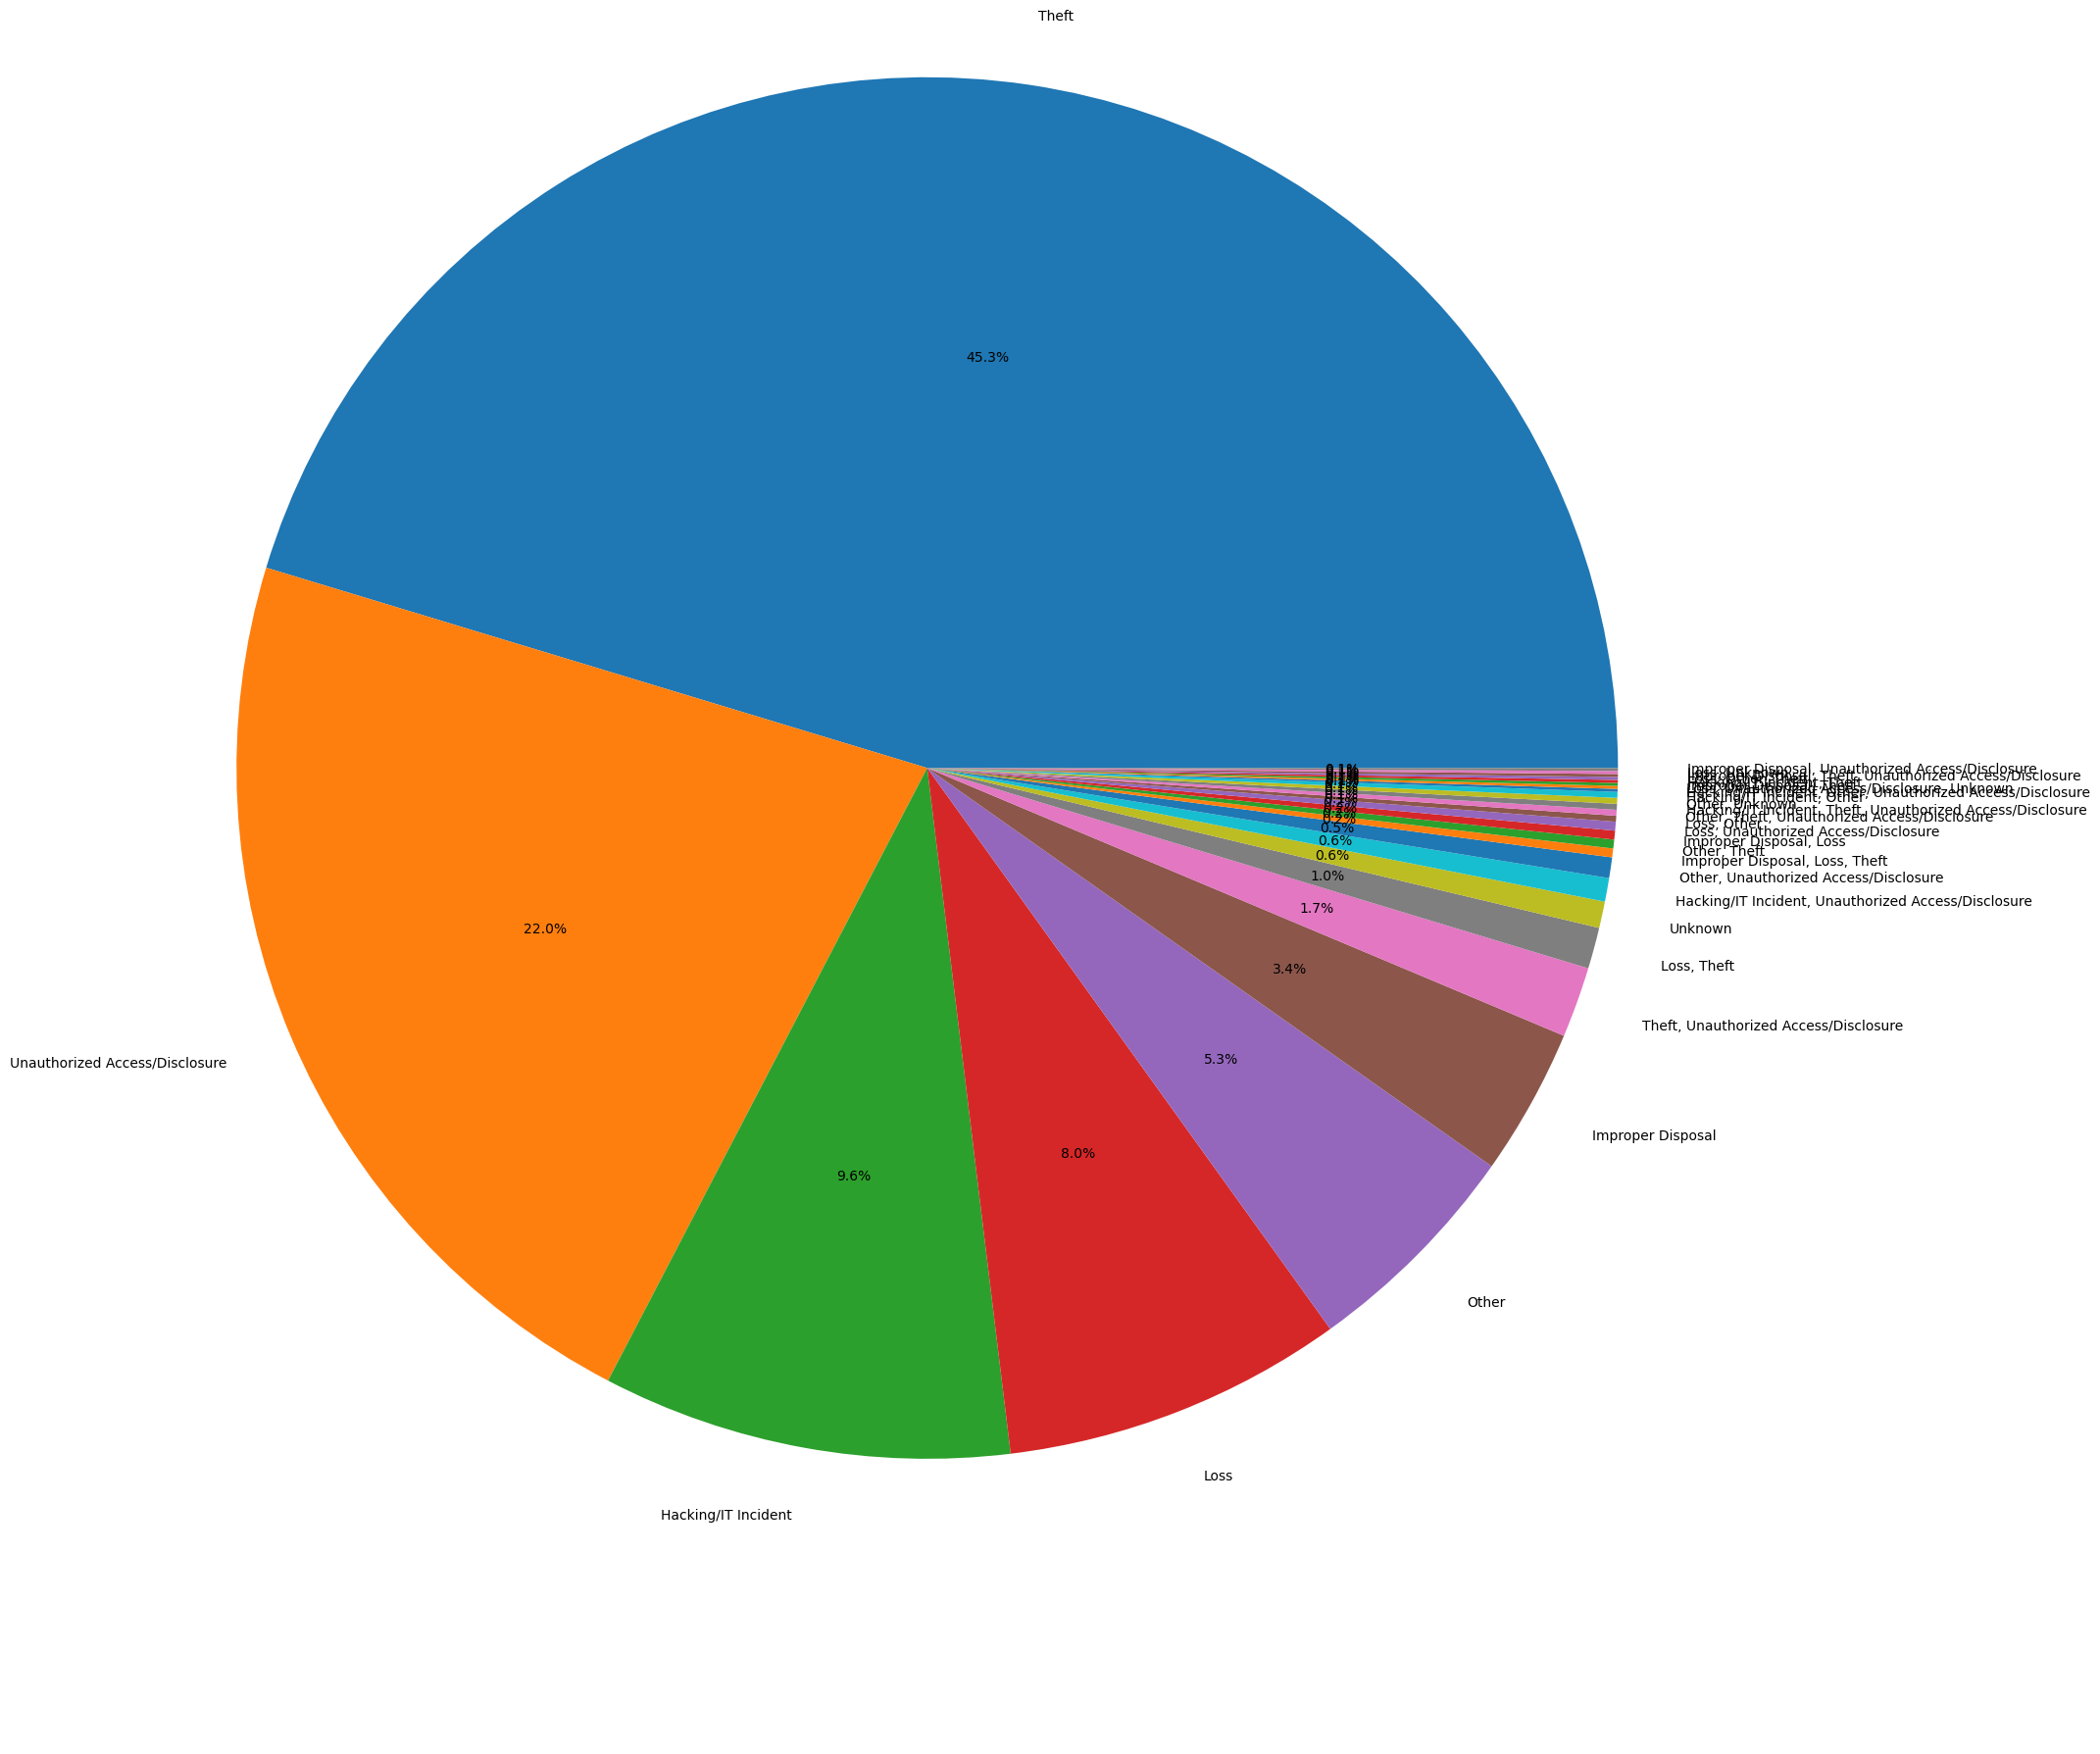

In [17]:
plt.figure(figsize=(20,20))
plt.title(' ', y=-0.15)
plt.pie(data['Type of Breach'].value_counts(), labels=list(data['Type of Breach'].value_counts().index), autopct="%.1f%%")
plt.axis('equal');

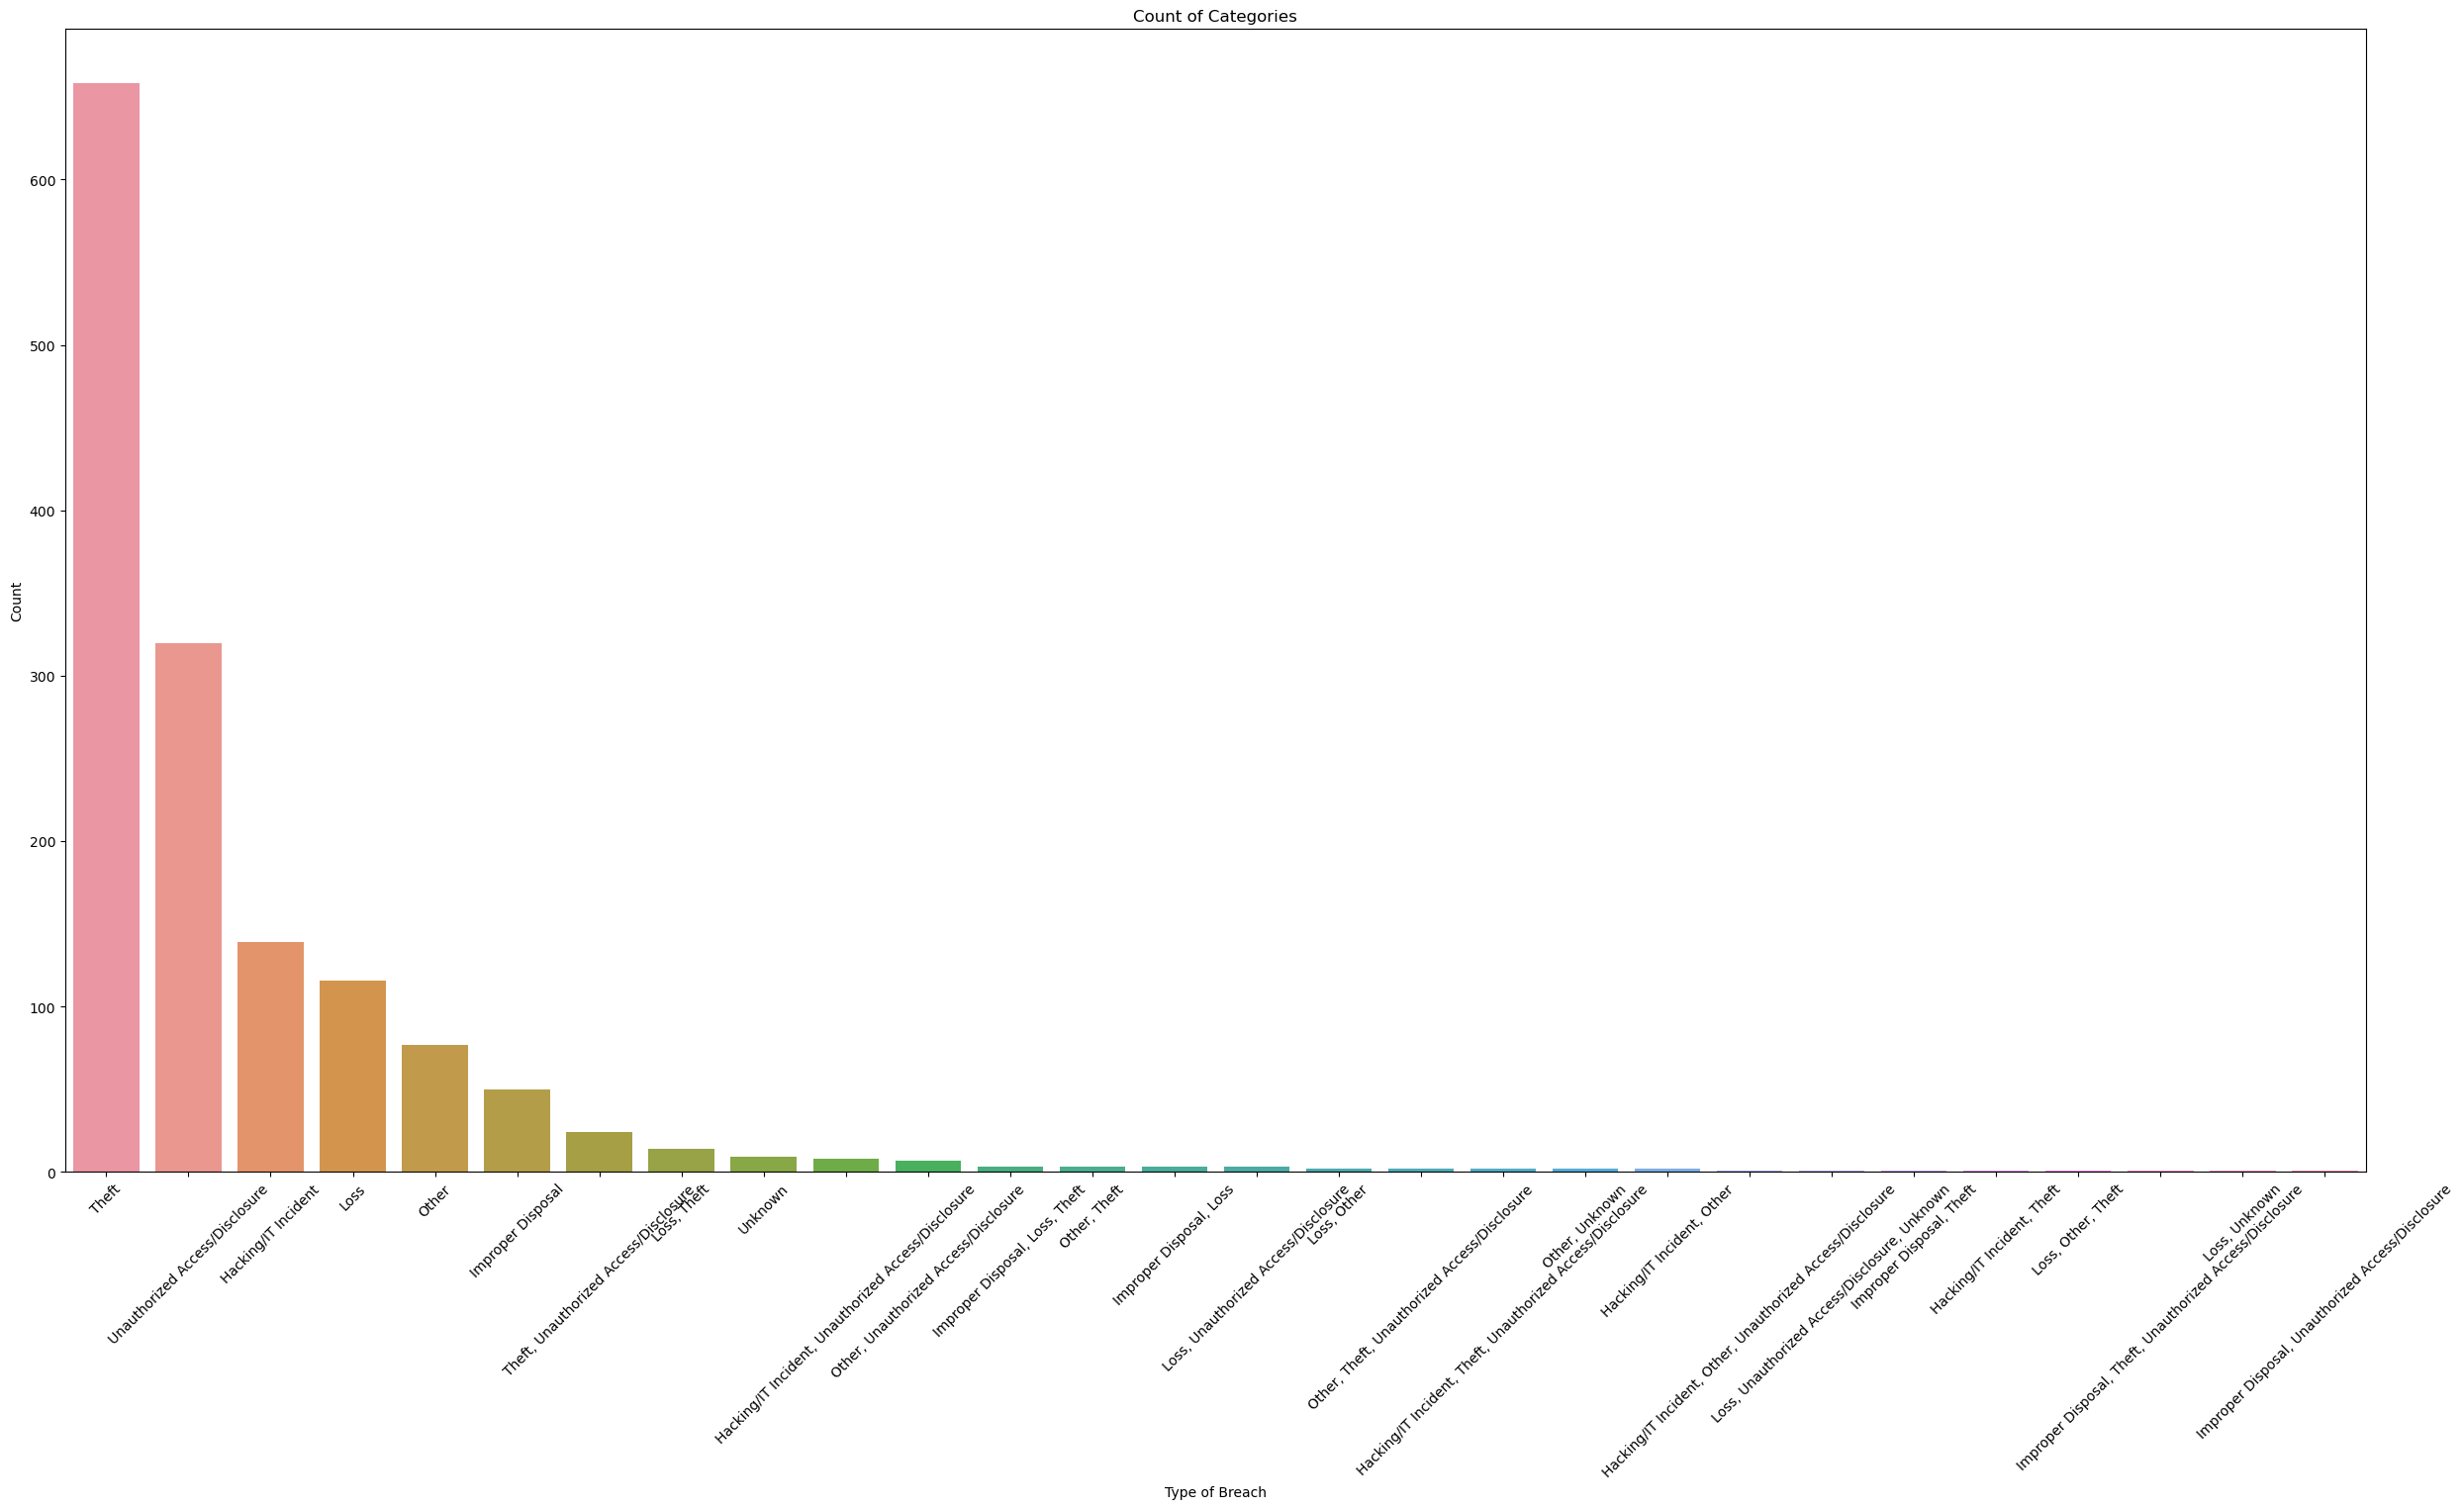

In [18]:
plt.figure(figsize=(30, 15))
sns.countplot(x='Type of Breach', data=data, dodge=True, order=data['Type of Breach'].value_counts().index)
plt.xlabel('Type of Breach')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=45)
plt.show()

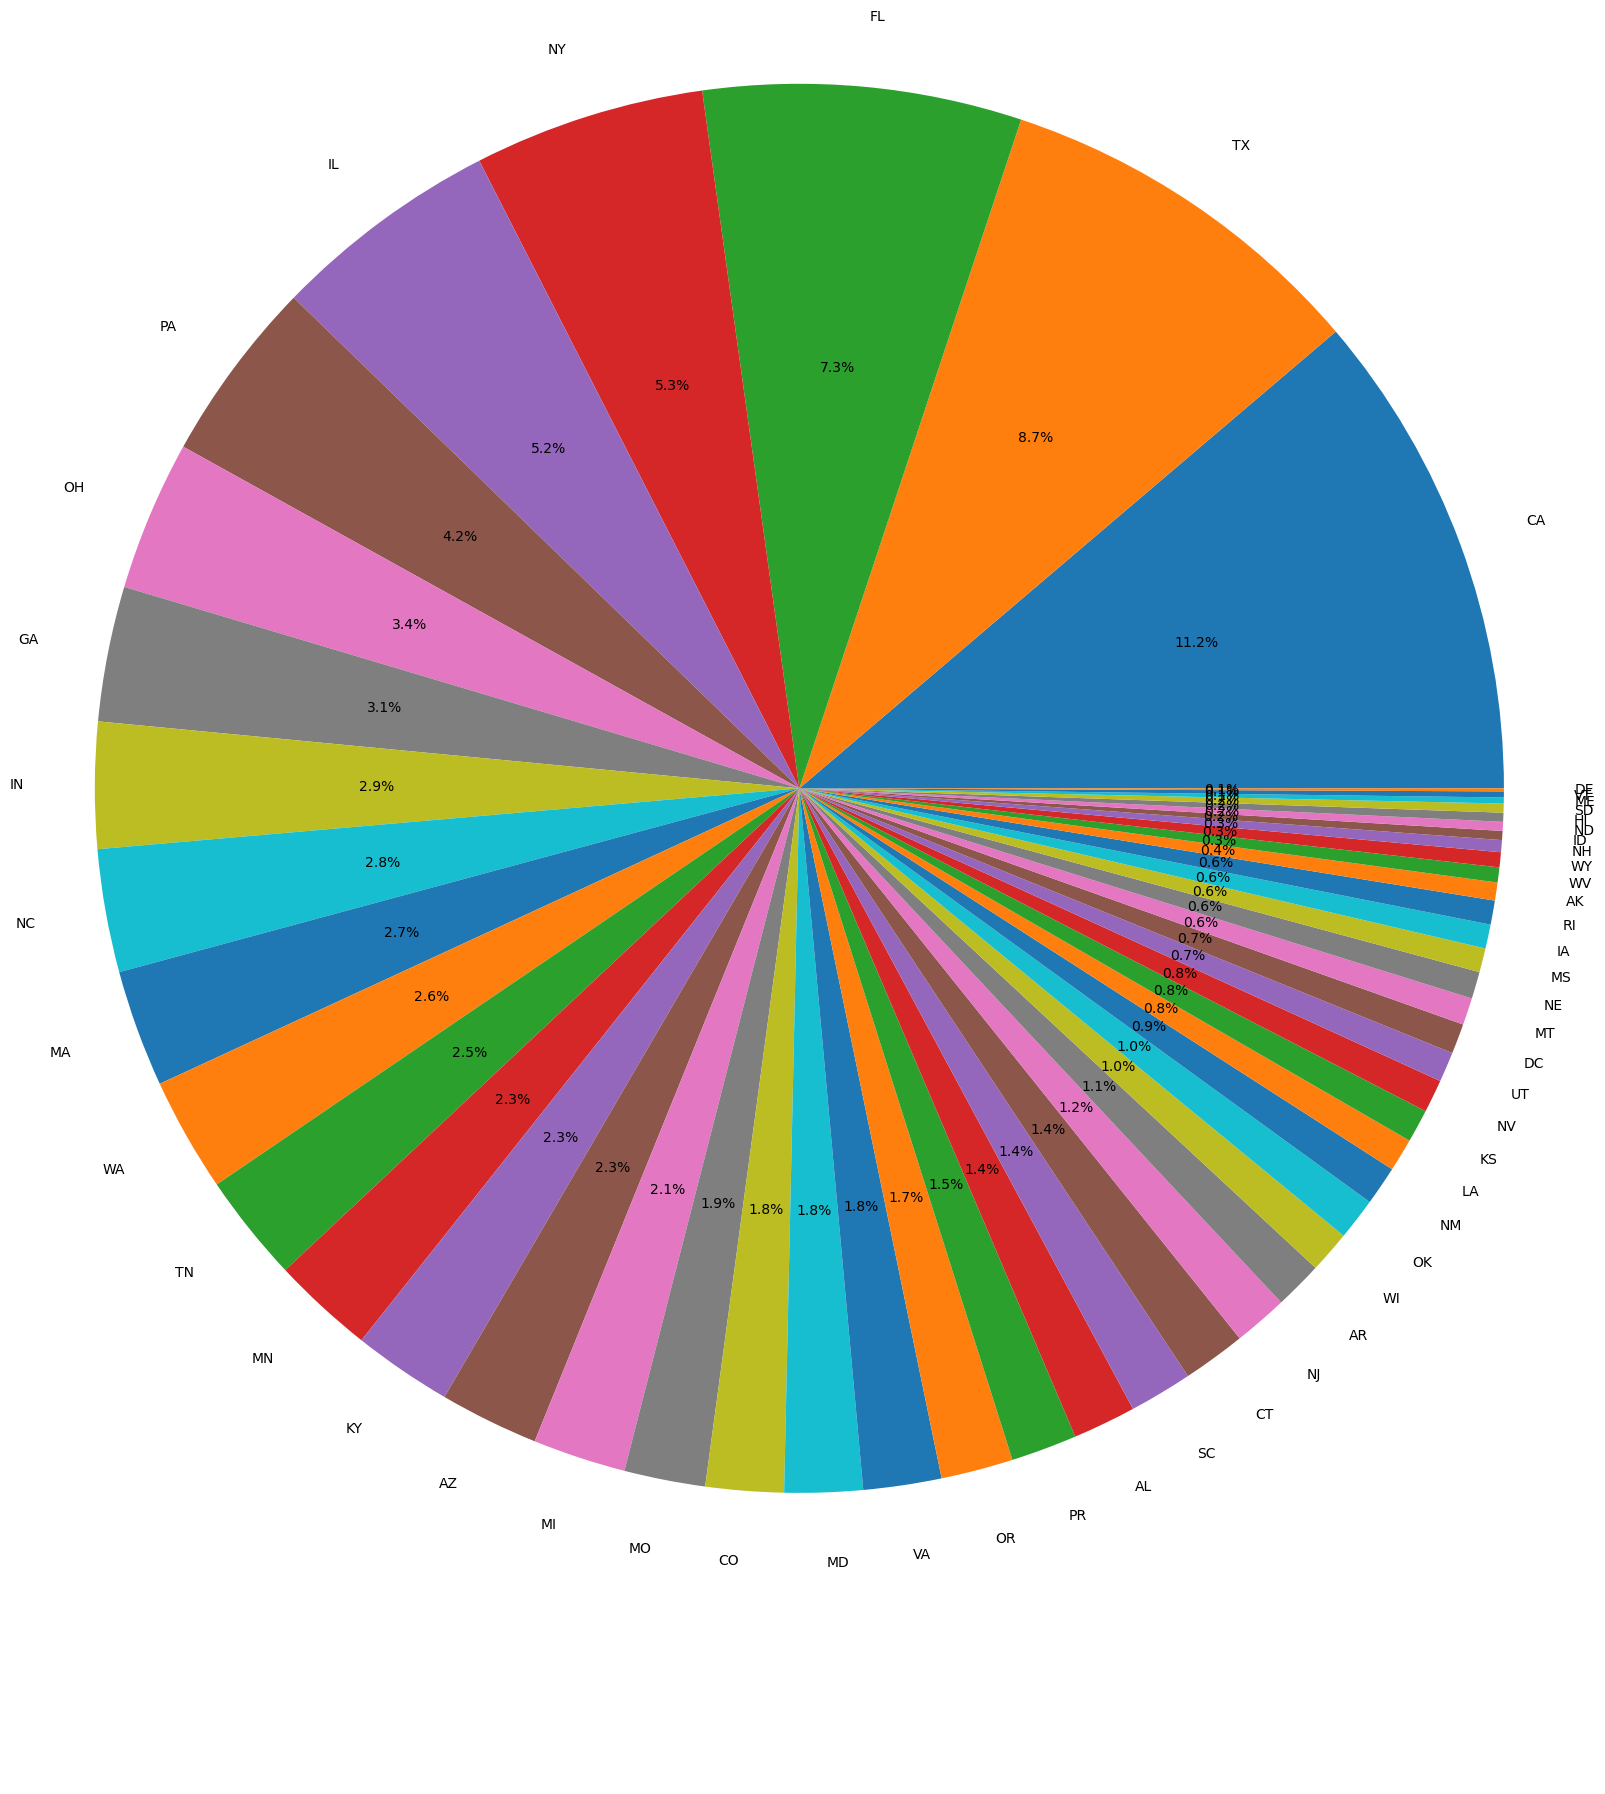

In [19]:
plt.figure(figsize=(20,20))
plt.title(' ', y=-0.15)
plt.pie(data['State'].value_counts(), labels=list(data['State'].value_counts().index), autopct="%.1f%%")
plt.axis('equal');

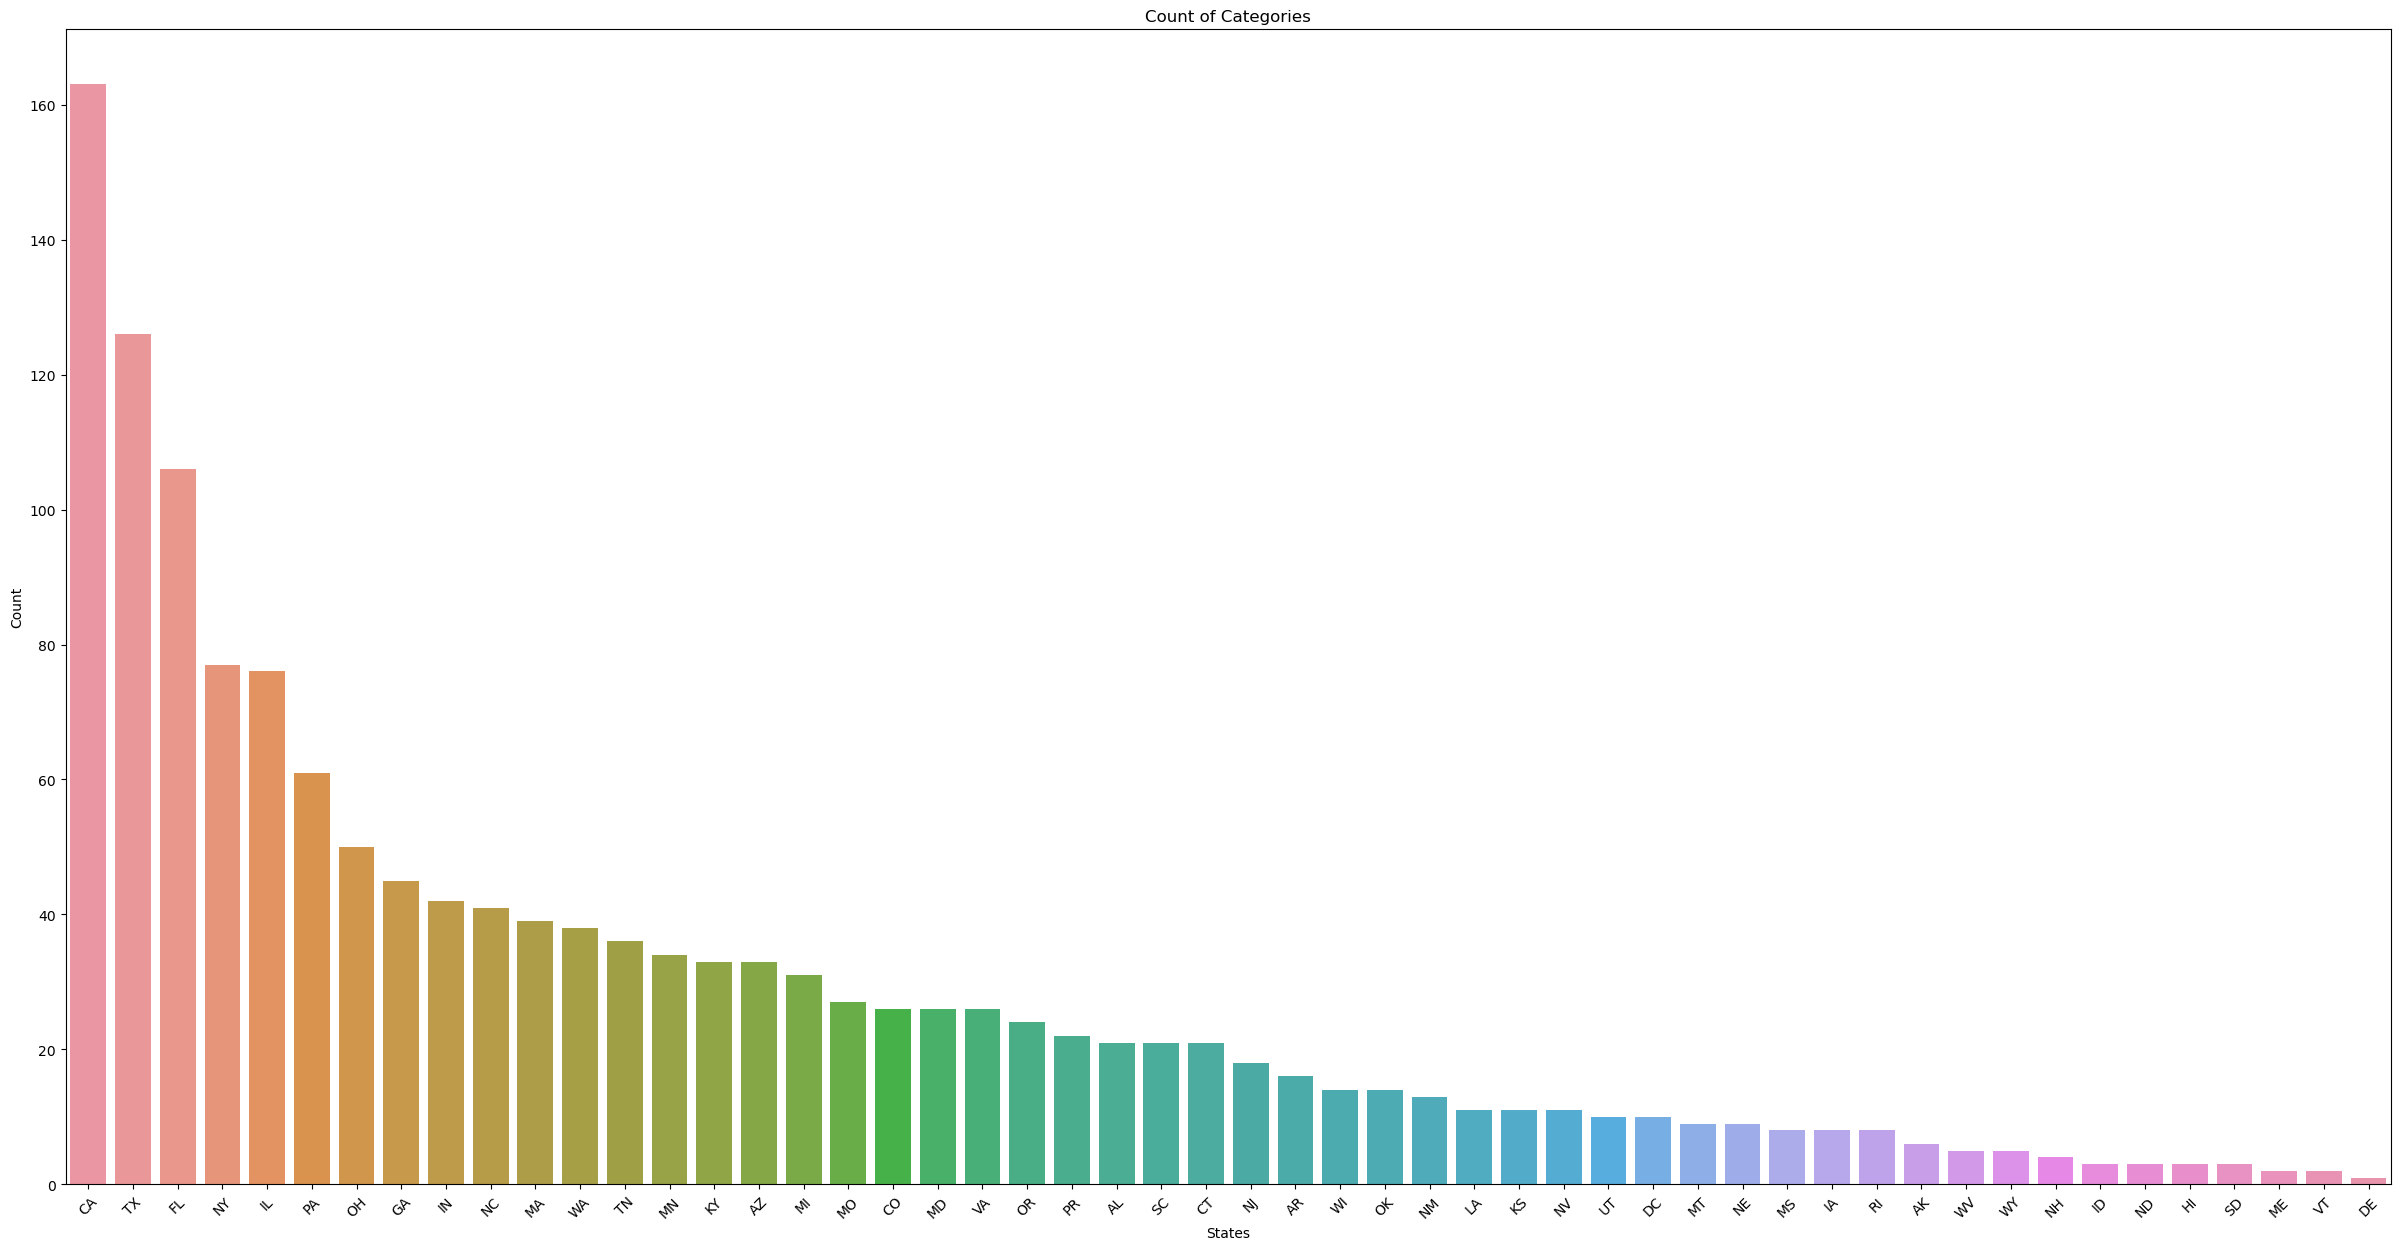

In [20]:
plt.figure(figsize=(30, 15))
sns.countplot(x='State', data=data, dodge=True, order=data['State'].value_counts().index)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Individuals Affected', ylabel='Type of Breach'>

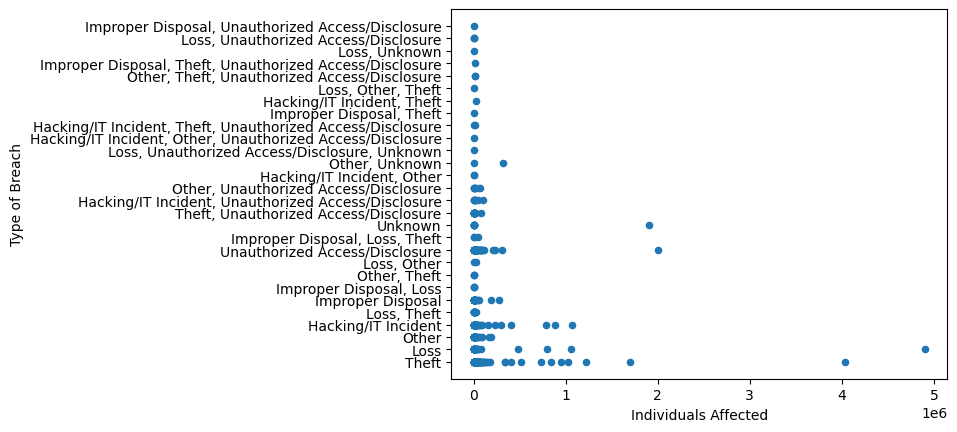

In [21]:
data.plot.scatter(x='Individuals Affected', y='Type of Breach')

METHOD-1

DATA SPLITTING AND PREPROCESSING

In [22]:
X=data.drop(['Type of Breach'],axis=1)
Y=data['Type of Breach']

In [23]:
X[0:5]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Desktop Computer,No,A shared Computer that was used for backup was...


In [24]:
Y[0:5]

0    Theft
1    Theft
2    Theft
3     Loss
4    Theft
Name: Type of Breach, dtype: object

CLASSIFICATION AND PREDICTION 

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [26]:
L=['Name of Covered Entity', 'State', 'Covered Entity Type', 'Breach Submission Date', 'Location of Breached Information', 'Business Associate Present', 'Web Description']
for sets in L:
    X_train[sets], list1 = pd.factorize(X_train[sets])
    X_test[sets], list1 = pd.factorize(X_test[sets])

In [27]:
X_train

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Location of Breached Information,Business Associate Present,Web Description
850,0,0,0,729000.0,0,0,0,0
1139,1,0,0,3206.0,1,1,0,1
556,2,1,0,500.0,2,0,0,1
1133,3,2,0,1376.0,3,2,0,1
931,4,3,0,9602.0,4,0,0,1
...,...,...,...,...,...,...,...,...
761,945,8,2,3133.0,748,2,1,1
981,946,12,0,1087.0,397,2,0,639
1203,947,10,0,860.0,749,2,0,640
244,515,12,0,2777.0,750,10,0,1


In [28]:
X_test

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Location of Breached Information,Business Associate Present,Web Description
674,0,0,0,109000.0,0,0,0,0
558,1,1,0,4000.0,1,1,0,0
1196,2,2,1,74944.0,2,2,0,1
592,3,3,0,10271.0,3,3,0,2
37,4,4,0,8000.0,4,0,0,3
...,...,...,...,...,...,...,...,...
904,415,5,2,2777.0,381,1,1,267
259,416,6,0,10000.0,382,8,0,0
78,417,31,0,2416.0,383,22,0,268
236,418,9,0,800.0,384,0,0,0


In [30]:
Y_train

850                                     Theft
1139                                    Theft
556                                     Theft
1133                        Improper Disposal
931                                     Theft
                        ...                  
761                                     Other
981     Theft, Unauthorized Access/Disclosure
1203                                    Theft
244                                      Loss
1162                                    Theft
Name: Type of Breach, Length: 1016, dtype: object

In [31]:
Y_test

674                                     Theft
558                                     Theft
1196                                     Loss
592     Theft, Unauthorized Access/Disclosure
37                                      Theft
                        ...                  
904                                     Theft
259                                     Theft
78                               Other, Theft
236                       Hacking/IT Incident
798            Unauthorized Access/Disclosure
Name: Type of Breach, Length: 436, dtype: object

In [32]:
best_model = None
best_accuracy = 0.0

In [33]:
model1= DecisionTreeClassifier()
model1.fit(X_train, Y_train)
Y_prediction=model1.predict(X_test)
a1=accuracy_score(Y_test, Y_prediction)
print("Accuracy is", a1*100)
if a1 > best_accuracy:
    best_accuracy = a1
    best_model = model1

Accuracy is 30.73394495412844


In [34]:
model2 = LogisticRegression()
model2.fit(X_train,Y_train)
Y_prediction= model2.predict(X_test)
from sklearn.metrics import accuracy_score
a2=accuracy_score(Y_test, Y_prediction)
print("Accuracy is", a2*100)
if a2 > best_accuracy:
    best_accuracy = a2
    best_model = model2

Accuracy is 42.6605504587156


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
model3= RandomForestClassifier(criterion='entropy')
model3.fit(X_train, Y_train)
Y_prediction=model3.predict(X_test)
a3=accuracy_score(Y_test, Y_prediction)
print("Accuracy of Random Forest Classifier is", a3*100)
if a3 > best_accuracy:
    best_accuracy = a3
    best_model = model3

Accuracy of Random Forest Classifier is 44.72477064220183


In [36]:
model4= KNeighborsClassifier(n_neighbors=1000)
model4.fit(X_train, Y_train)
Y_prediction=model4.predict(X_test)
a4=accuracy_score(Y_test, Y_prediction)
print("Accuracy of K Neighbors Classifier is", a4*100)
if a4 > best_accuracy:
    best_accuracy = a4
    best_model = model4

Accuracy of K Neighbors Classifier is 44.03669724770643


METHOD-2

DATA SPLITTING AND PREPROCESSING

In [37]:
data1 = data[['Type of Breach', 'Web Description']].dropna()
X1 = data1['Web Description']
Y1 = data1['Type of Breach']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

CLASSIFICATION AND PREDICTION

In [48]:
vectorizer = CountVectorizer()
X1_train_vectors = vectorizer.fit_transform(X1_train)
X1_test_vectors = vectorizer.transform(X1_test)
model = MultinomialNB()
model.fit(X1_train_vectors, Y1_train)
Y1_prediction = model.predict(X1_test_vectors)
b=accuracy_score(Y1_test, Y1_prediction)
print("Accuracy of Random Forest Classifier is", b*100)
if b > best_accuracy:
    best_accuracy = b
    best_model = model

Accuracy of Random Forest Classifier is 54.12844036697248


In [49]:
print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)

Best Model: MultinomialNB()
Best Model Accuracy: 0.5412844036697247


In [50]:
web_descriptions = []
input1=int(input("Enter the limit: "))
i=0
while(i<input1):
    d=input("Enter the web description: ")
    web_descriptions.append(d)
    X_test = vectorizer.transform(web_descriptions)
    predictions = best_model.predict(X_test)
    print(predictions)
    i=i+1

Enter the limit: 1
Enter the web description: A binder containing the protected health information (PHI) of up to 1,272 individuals was stolen from a staff member's vehicle.  The PHI included names, telephone numbers, detailed treatment notes, and possibly social security numbers.  In response to the breach, the covered entity (CE) sanctioned the workforce member and developed a new policy requiring on-call staff members to submit any information created during their shifts to the main office instead of adding it to the binder.  Following OCR's investigation, the CE notified the local media about the breach.
['Theft']


By - Yaman Dahiya